# Federico Ariton
### Higher Diploma in Science in Data Analytics for Business
### CA 1 Data Visualisation Techniques
### Student Number:sba22090

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
warnings.filterwarnings('ignore') 

In [2]:
Games = pd.read_csv('vgsales.csv')
Games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


# DATA PREPARATION AND EDA

In [3]:
Games.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
Games.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [5]:
Games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
Games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [7]:
Games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
Games['User_Score'] = pd.to_numeric(Games['User_Score'], errors='coerce')
Games.dtypes, Games.head()

(Name                object
 Platform            object
 Year_of_Release    float64
 Genre               object
 Publisher           object
 NA_Sales           float64
 EU_Sales           float64
 JP_Sales           float64
 Other_Sales        float64
 Global_Sales       float64
 Critic_Score       float64
 Critic_Count       float64
 User_Score         float64
 User_Count         float64
 Developer           object
 Rating              object
 dtype: object,
                        Name Platform  Year_of_Release         Genre Publisher  \
 0                Wii Sports      Wii           2006.0        Sports  Nintendo   
 1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
 2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
 3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
 4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   
 
    NA_Sales  EU_Sales  JP_Sales  Other_Sa

# TOP 5 GAMES BY GLOBAL SALES

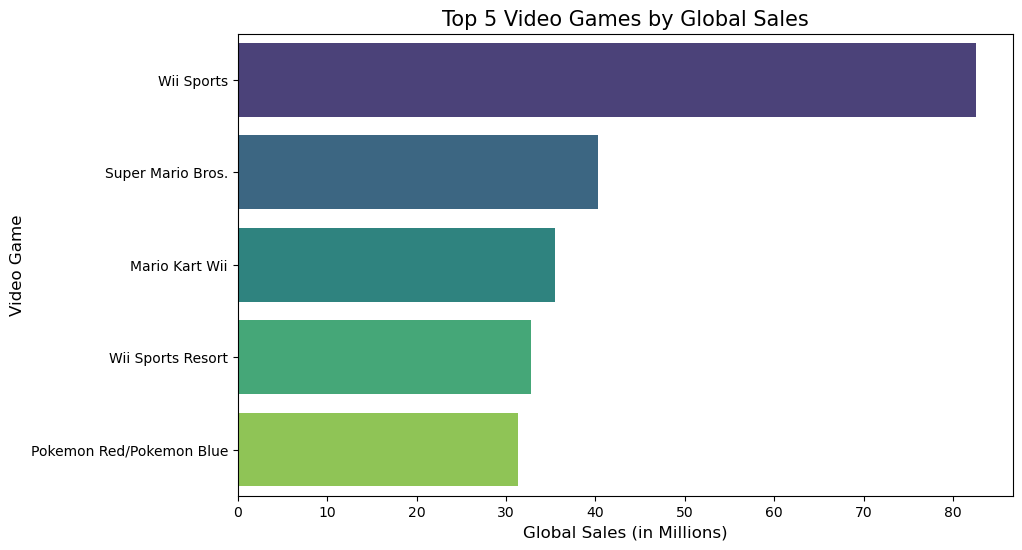

In [9]:
top_5_games = Games.nlargest(5, 'Global_Sales')

plt.figure(figsize=(10, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_5_games, palette='viridis')

plt.title('Top 5 Video Games by Global Sales', fontsize=15)
plt.xlabel('Global Sales (in Millions)', fontsize=12)
plt.ylabel('Video Game', fontsize=12)
plt.show()

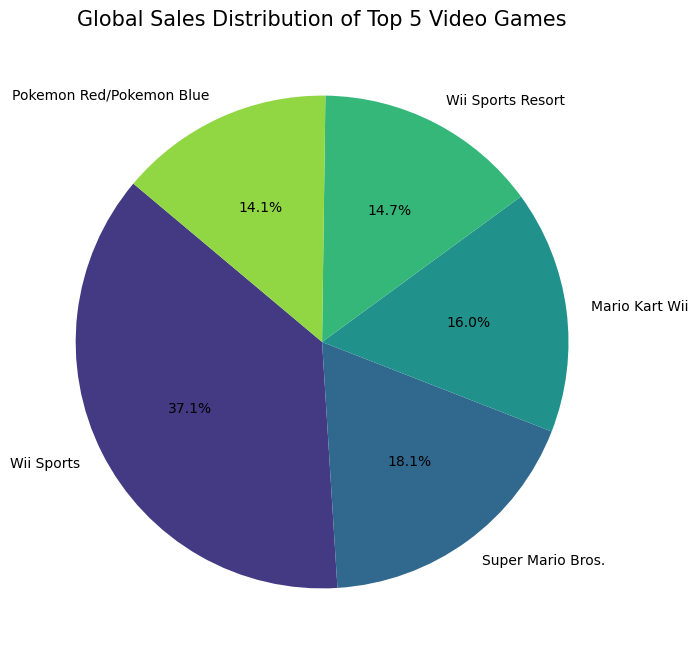

In [10]:
pie_data = top_5_games.set_index('Name')['Global_Sales']

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(pie_data)))
plt.title('Global Sales Distribution of Top 5 Video Games', fontsize=15)
plt.show()

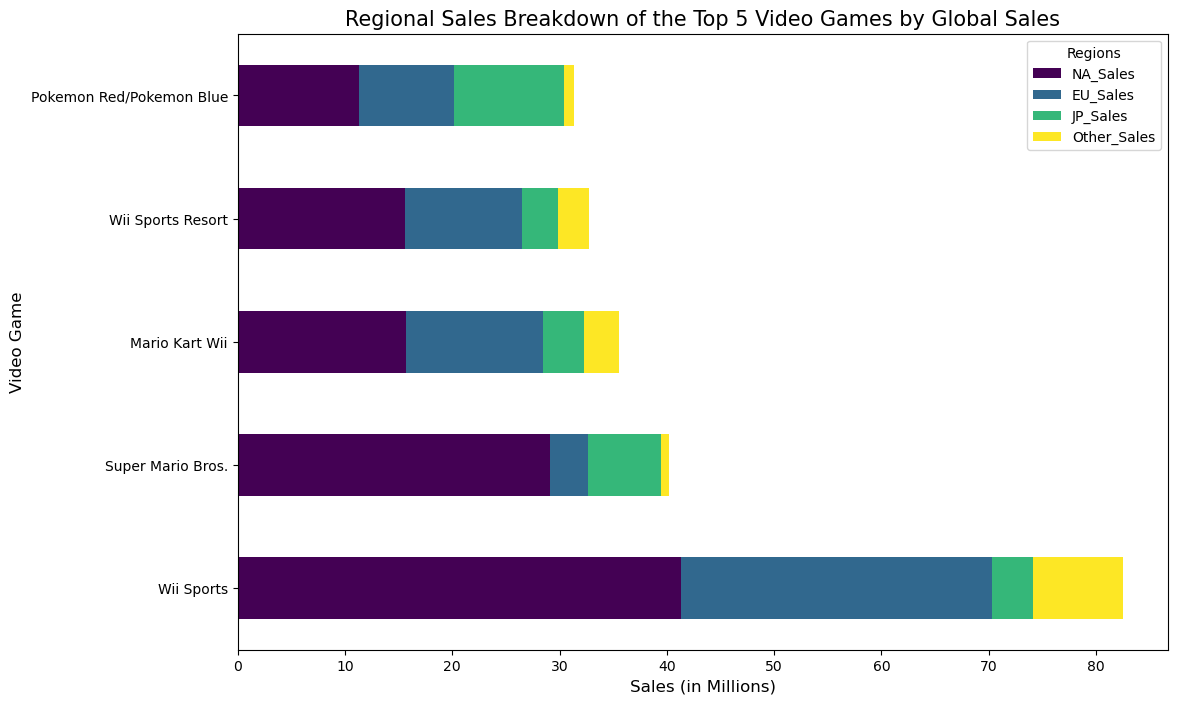

In [11]:
columns_of_interest = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
regional_sales = top_5_games[columns_of_interest].set_index('Name')

regional_sales.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Regional Sales Breakdown of the Top 5 Video Games by Global Sales', fontsize=15)
plt.xlabel('Sales (in Millions)', fontsize=12)
plt.ylabel('Video Game', fontsize=12)
plt.legend(title='Regions')
plt.show()

In [12]:
top_5_global_games = Games[Games['Name'].isin(['Wii Sports', 'Super Mario Bros.', 
                                                         'Mario Kart Wii', 'Wii Sports Resort', 
                                                         'Pokemon Red/Pokemon Blue'])]

top_5_global_analysis = top_5_global_games[['Name', 'Platform', 'Year_of_Release', 
                                           'NA_Sales', 'EU_Sales', 'JP_Sales', 
                                           'Other_Sales', 'Global_Sales']]


top_5_global_analysis_grouped = top_5_global_analysis.groupby('Name').sum()
top_5_global_analysis_grouped.reset_index(inplace=True)


platform_release = top_5_global_games[['Name', 'Platform', 'Year_of_Release']].drop_duplicates()
top_5_global_analysis_final = top_5_global_analysis_grouped.merge(platform_release, on='Name')

top_5_global_analysis_final


,Name,Year_of_Release_x,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Platform,Year_of_Release_y
0,Mario Kart Wii,2008.0,15.68,12.76,3.79,3.29,35.52,Wii,2008.0
1,Pokemon Red/Pokemon Blue,1996.0,11.27,8.89,10.22,1.00,31.37,GB,1996.0
2,Super Mario Bros.,3984.0,32.48,4.88,6.96,0.99,45.31,NES,1985.0
3,Super Mario Bros.,3984.0,32.48,4.88,6.96,0.99,45.31,GB,1999.0
4,Wii Sports,2006.0,41.36,28.96,3.77,8.45,82.53,Wii,2006.0
5,Wii Sports Resort,2009.0,15.61,10.93,3.28,2.95,32.77,Wii,2009.0


# CORRELATION BETWEEN NA SALES AND JP SALES

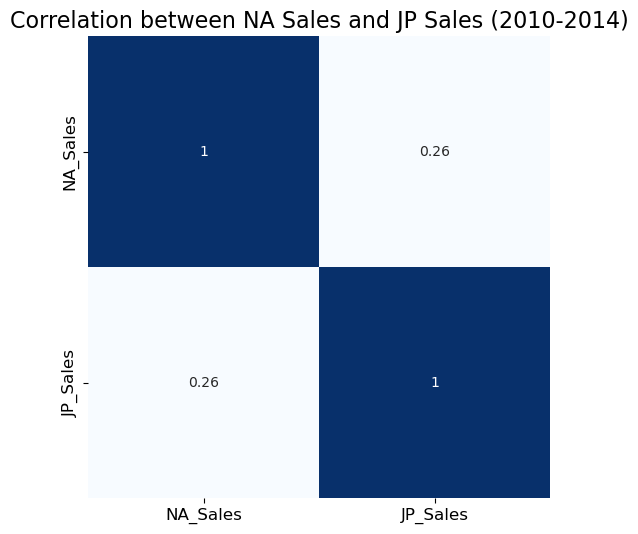

0.26043134778810195

In [13]:
sales_2010_2014 = Games[(Games['Year_of_Release'] >= 2010) & (Games['Year_of_Release'] <= 2014)]

correlation = sales_2010_2014[['NA_Sales', 'JP_Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='Blues', cbar=False, square=True)
plt.title('Correlation between NA Sales and JP Sales (2010-2014)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

correlation_value = correlation.loc['NA_Sales', 'JP_Sales']
correlation_value


In [14]:
corr_na_jp, _ = pearsonr(sales_2010_2014['NA_Sales'], sales_2010_2014['JP_Sales'])

corr_na_jp_output = 'Pearsons correlation between NA Sales and JP Sales (2010-2014): %.3f' % corr_na_jp
corr_na_jp_output


'Pearsons correlation between NA Sales and JP Sales (2010-2014): 0.260'

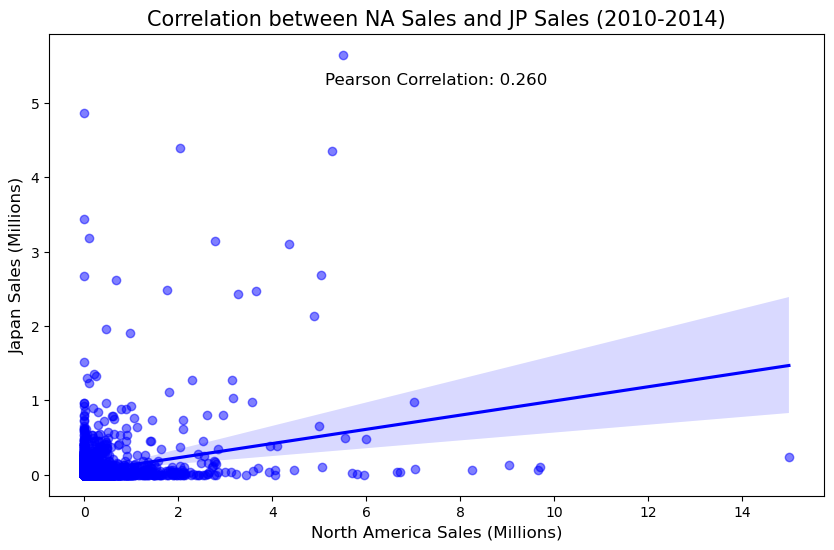

In [15]:
plt.figure(figsize=(10, 6))
sns.regplot(x='NA_Sales', y='JP_Sales', data=sales_2010_2014, color='blue', scatter_kws={'alpha':0.5})

plt.text(0.5, 0.9, f'Pearson Correlation: {corr_na_jp:.3f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)

plt.title('Correlation between NA Sales and JP Sales (2010-2014)', fontsize=15)
plt.xlabel('North America Sales (Millions)', fontsize=12)
plt.ylabel('Japan Sales (Millions)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


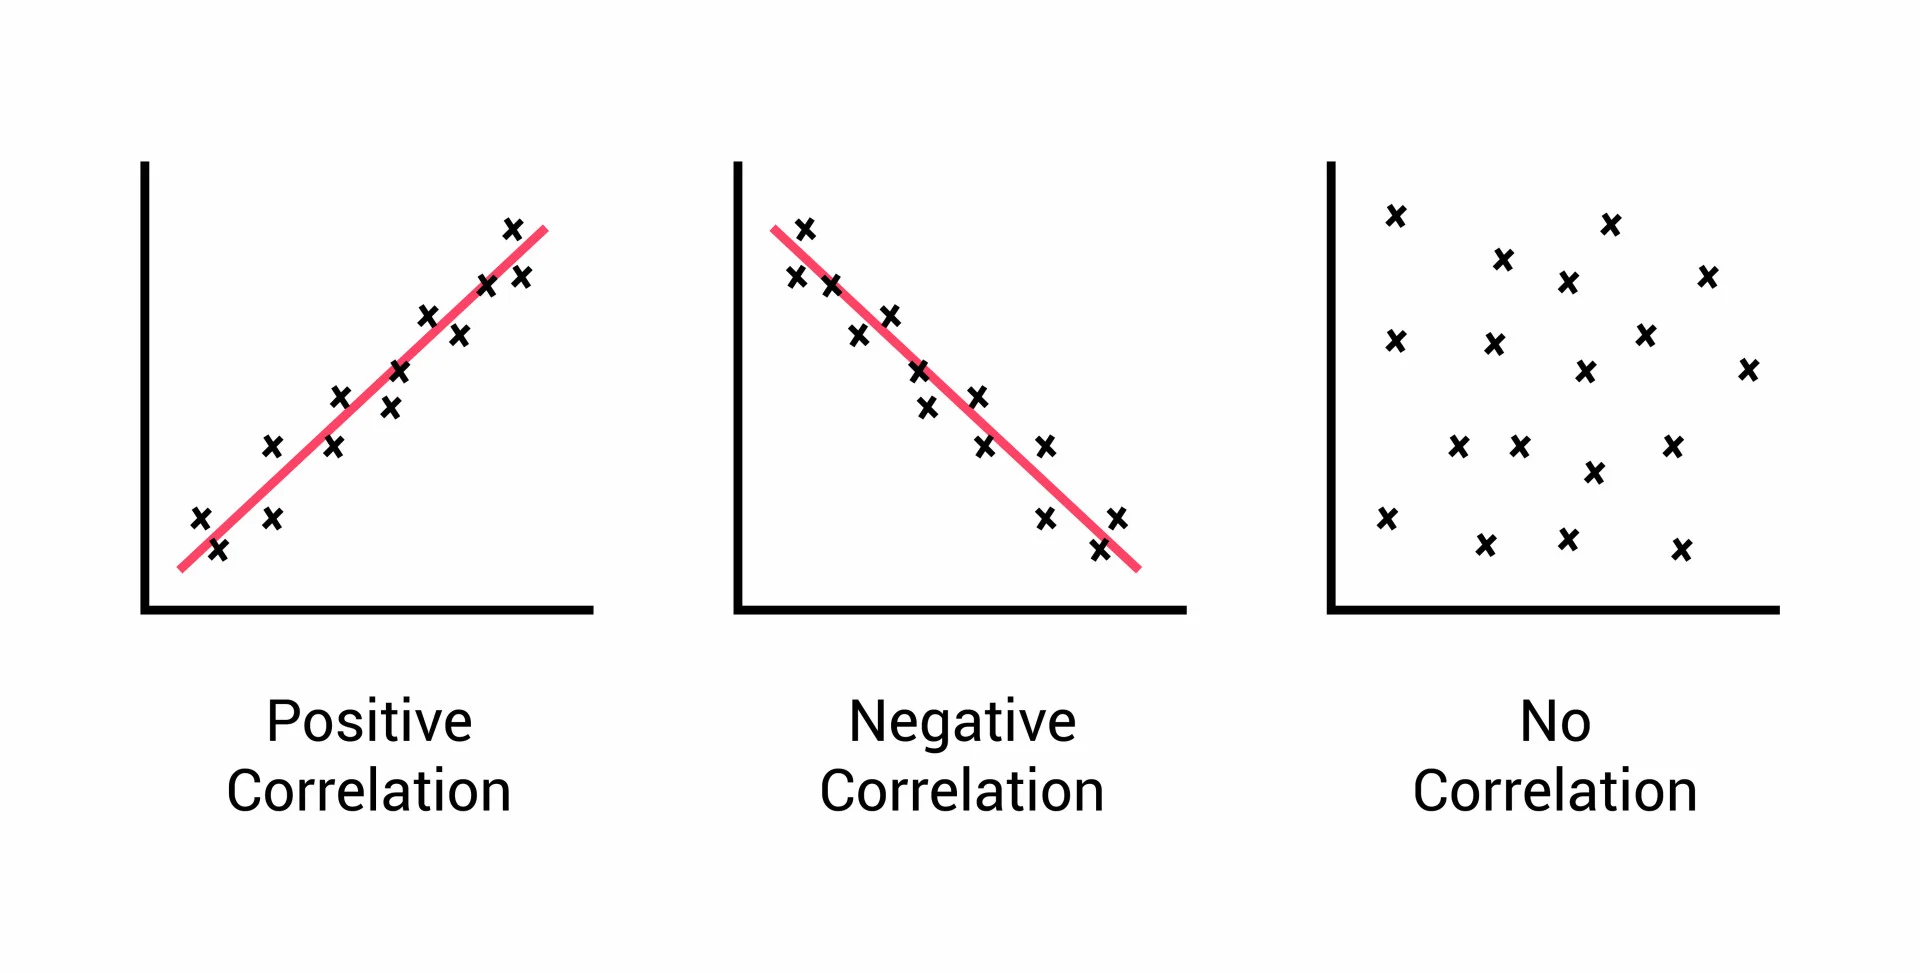

In [16]:
from IPython.display import Image
Image(filename='correlation.png')


# DISTRIBUTION OF THE MOST POPULAR 4 GAMES GENRES

In [17]:
genre_counts = Games['Genre'].value_counts()
genre_sales = Games.groupby('Genre')['Global_Sales'].sum()

In [18]:
colors = plt.cm.tab20(range(len(genre_sales)))
color_mapping = {genre: color for genre, color in zip(genre_sales.sort_values(ascending=False).index, colors)}

bar_colors = [color_mapping[genre] for genre in genre_counts.index]

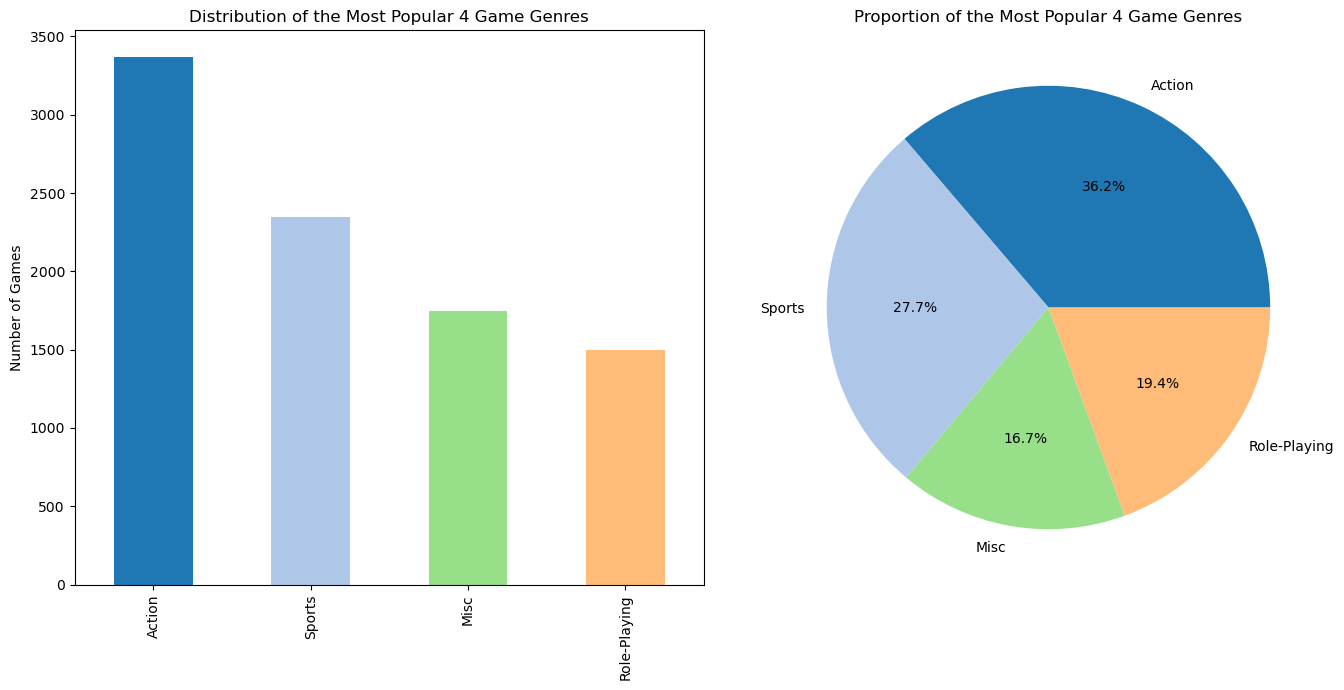

In [19]:
top_4_genres = genre_counts.head(4).index

top_genre_counts = genre_counts[top_4_genres]
top_genre_sales = genre_sales[top_4_genres]

top_colors = [color_mapping[genre] for genre in top_4_genres]


fig, ax = plt.subplots(1, 2, figsize=(14, 7))


top_genre_counts.plot(kind='bar', ax=ax[0], color=top_colors)
ax[0].set_title('Distribution of the Most Popular 4 Game Genres')
ax[0].set_ylabel('Number of Games')

top_genre_sales.plot(kind='pie', ax=ax[1], colors=top_colors, autopct='%1.1f%%')
ax[1].set_title('Proportion of the Most Popular 4 Game Genres')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()


# OLDER VS NEWER GAMES

In [20]:
filtered_data = Games[(Games['Year_of_Release'] <= 2005) & (Games['Year_of_Release'].notna())]
filtered_data = filtered_data[filtered_data['EU_Sales'].notna()]

filtered_data.head()

mean_eu_sales = filtered_data['EU_Sales'].mean()

mean_eu_sales


0.1479159168984132

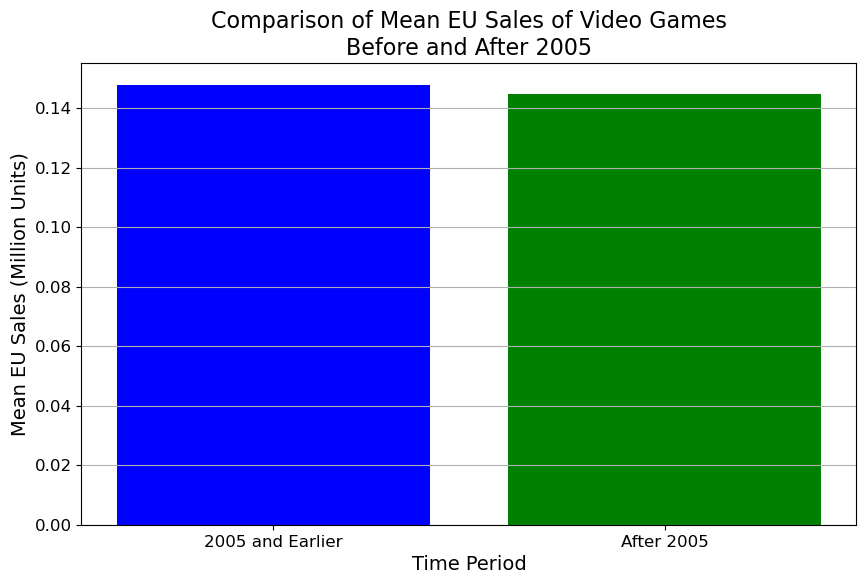

{'2005 and Earlier': 0.1479159168984132, 'After 2005': 0.14472284028248042}

In [21]:
mean_eu_sales_newer_games = Games[Games['Year_of_Release'] > 2005]['EU_Sales'].mean()

mean_sales_comparison = {
    '2005 and Earlier': mean_eu_sales,
    'After 2005': mean_eu_sales_newer_games
}

plt.figure(figsize=(10, 6))
plt.bar(mean_sales_comparison.keys(), mean_sales_comparison.values(), color=['blue', 'green'])
plt.xlabel('Time Period', fontsize=14)
plt.ylabel('Mean EU Sales (Million Units)', fontsize=14)
plt.title('Comparison of Mean EU Sales of Video Games\nBefore and After 2005', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')

plt.show()

mean_sales_comparison


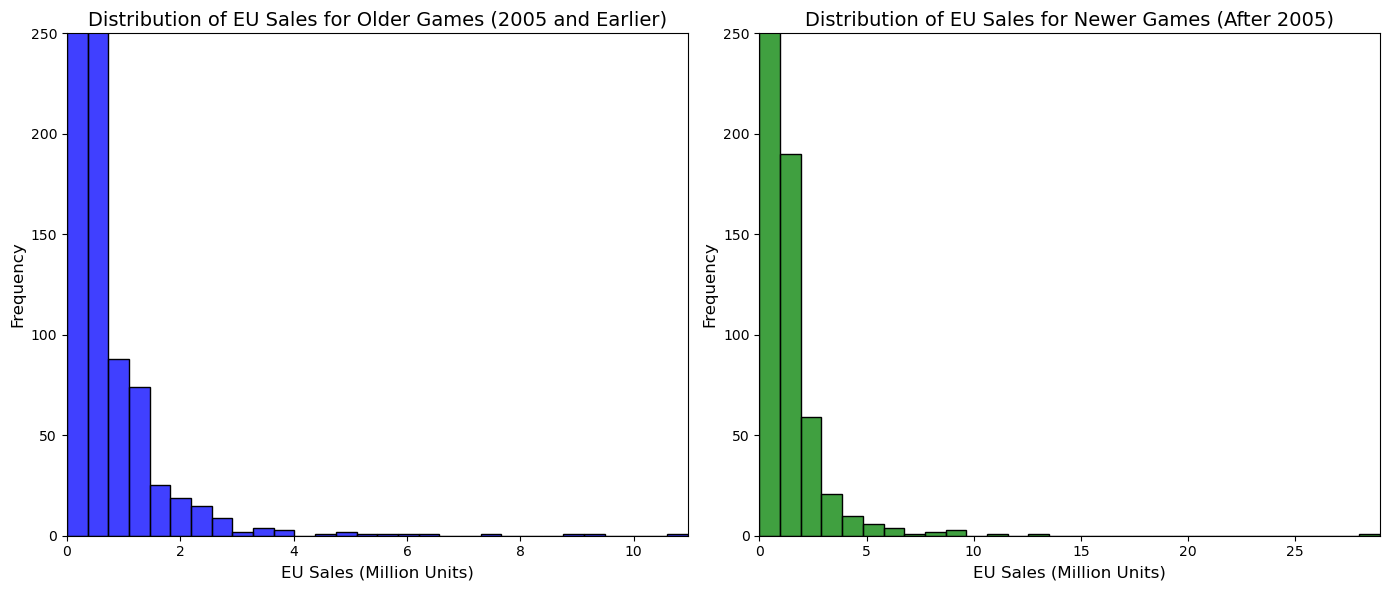

In [22]:
filtered_data = Games[(Games['Year_of_Release'] <= 2005) & (Games['Year_of_Release'].notna())]
filtered_data = filtered_data[filtered_data['EU_Sales'].notna()]

filtered_data.head()

older_games_sales = filtered_data['EU_Sales']
newer_games_sales = Games[Games['Year_of_Release'] > 2005]['EU_Sales']


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1) 
sns.histplot(older_games_sales, bins=30, kde=False, color='blue')
plt.title('Distribution of EU Sales for Older Games (2005 and Earlier)', fontsize=14)
plt.xlabel('EU Sales (Million Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, older_games_sales.max())
plt.ylim(0, 250)  


plt.subplot(1, 2, 2)  
sns.histplot(newer_games_sales, bins=30, kde=False, color='green')
plt.title('Distribution of EU Sales for Newer Games (After 2005)', fontsize=14)
plt.xlabel('EU Sales (Million Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, newer_games_sales.max())
plt.ylim(0, 250)  


plt.tight_layout()
plt.show()


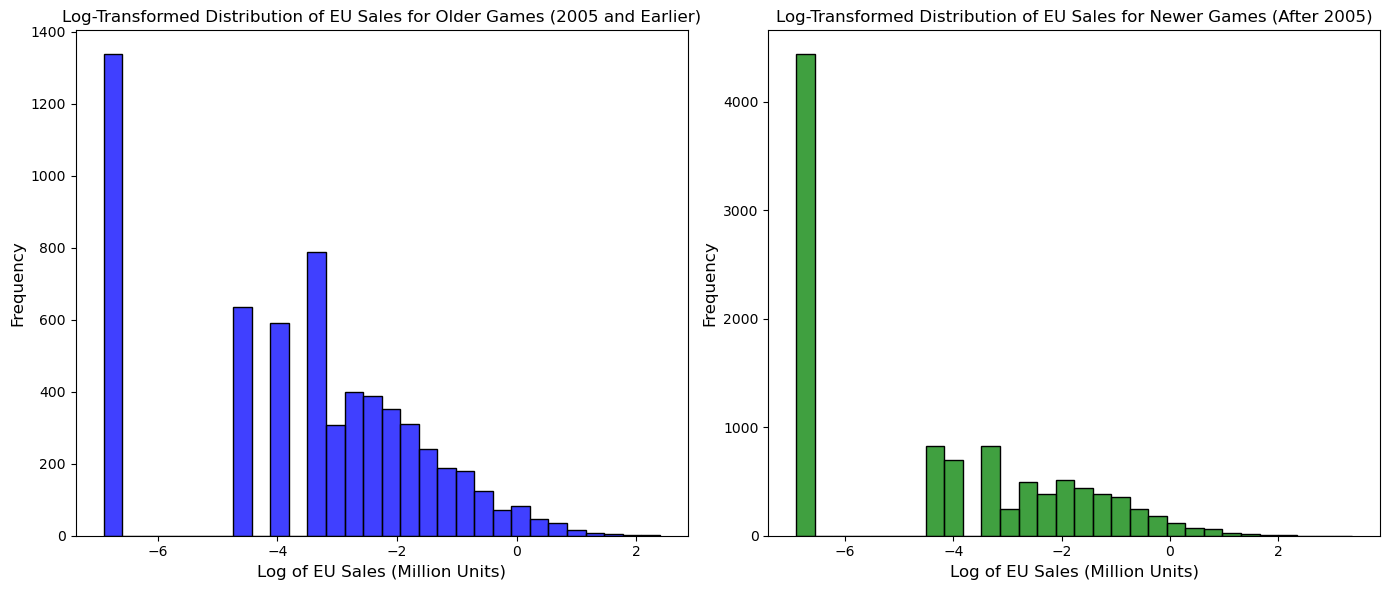

In [23]:
older_games_sales_log = np.log(older_games_sales + 1e-3)
newer_games_sales_log = np.log(newer_games_sales + 1e-3)


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
sns.histplot(older_games_sales_log, bins=30, kde=False, color='blue')
plt.title('Log-Transformed Distribution of EU Sales for Older Games (2005 and Earlier)', fontsize=12)
plt.xlabel('Log of EU Sales (Million Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
sns.histplot(newer_games_sales_log, bins=30, kde=False, color='green')
plt.title('Log-Transformed Distribution of EU Sales for Newer Games (After 2005)', fontsize=12)
plt.xlabel('Log of EU Sales (Million Units)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()

# THE 3 MOST COMMON DEVELOPERS

In [24]:
frequency = Games['Developer'].value_counts()
frequency

Ubisoft                                   204
EA Sports                                 172
EA Canada                                 167
Konami                                    162
Capcom                                    139
                                         ... 
Genki, Kojima Productions                   1
Warner Bros. Interactive Entertainment      1
THQ, Altron                                 1
Netherock Ltd.                              1
Interchannel-Holon                          1
Name: Developer, Length: 1696, dtype: int64

In [25]:
missing_values = Games['Developer'].isnull()
print(f"Total missing values in Developer")
print(missing_values.sum())

Total missing values in Developer
6623


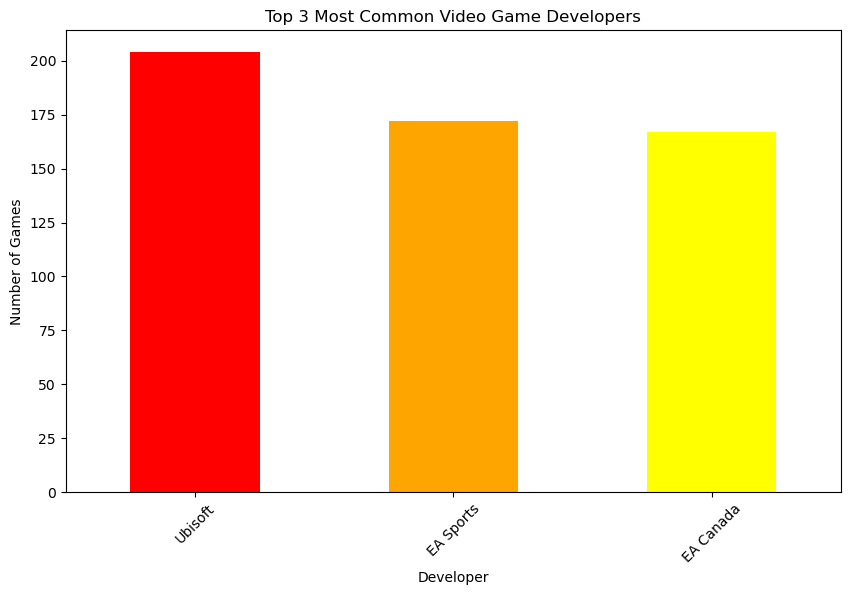

In [26]:
developer_counts = Games['Developer'].value_counts()
top_3_developers = developer_counts.head(3)

plt.figure(figsize=(10, 6))
top_3_developers.plot(kind='bar',  color=['red', 'orange','yellow'])
plt.title('Top 3 Most Common Video Game Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

In [27]:

common_developer_by_publisher = Games.groupby('Publisher')['Developer'].agg(pd.Series.mode).to_dict()


def impute_developer(row):
    if pd.isna(row['Developer']) and row['Publisher'] in common_developer_by_publisher:
        return common_developer_by_publisher[row['Publisher']]
    return row['Developer']


Games['Developer'] = Games.apply(impute_developer, axis=1)


remaining_missing_developers = Games['Developer'].isna().sum()
remaining_missing_developers


45

In [28]:
frequency = Games['Developer'].value_counts()
frequency

Namco                                     681
Konami                                    611
Nintendo                                  463
EA Sports                                 388
Ubisoft                                   350
                                         ... 
Pam Development, 2K Sports                  1
Microids, Dreamcatcher                      1
Virtual Air Guitar Company                  1
Big Blue Bubble Inc., Scholastic, Inc.      1
Interchannel-Holon                          1
Name: Developer, Length: 1984, dtype: int64

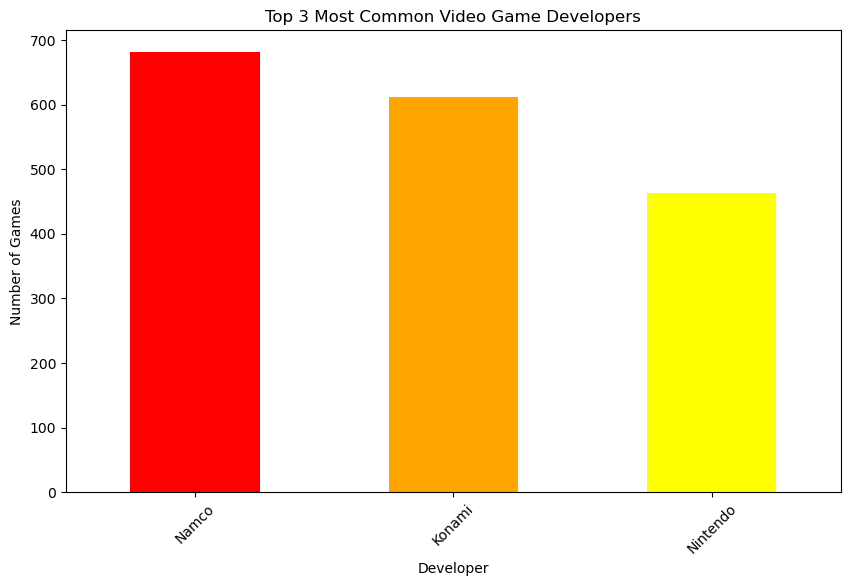

In [29]:
developer_counts = Games['Developer'].value_counts()
top_3_developers = developer_counts.head(3)


plt.figure(figsize=(10, 6))
top_3_developers.plot(kind='bar', color=['red', 'orange','yellow'])
plt.title('Top 3 Most Common Video Game Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

In [30]:
missing_values = Games['Developer'].isnull()
print(f"Total missing values in Developer")
print(missing_values.sum())

Total missing values in Developer
45


# STATISTICALLY RELEVANT

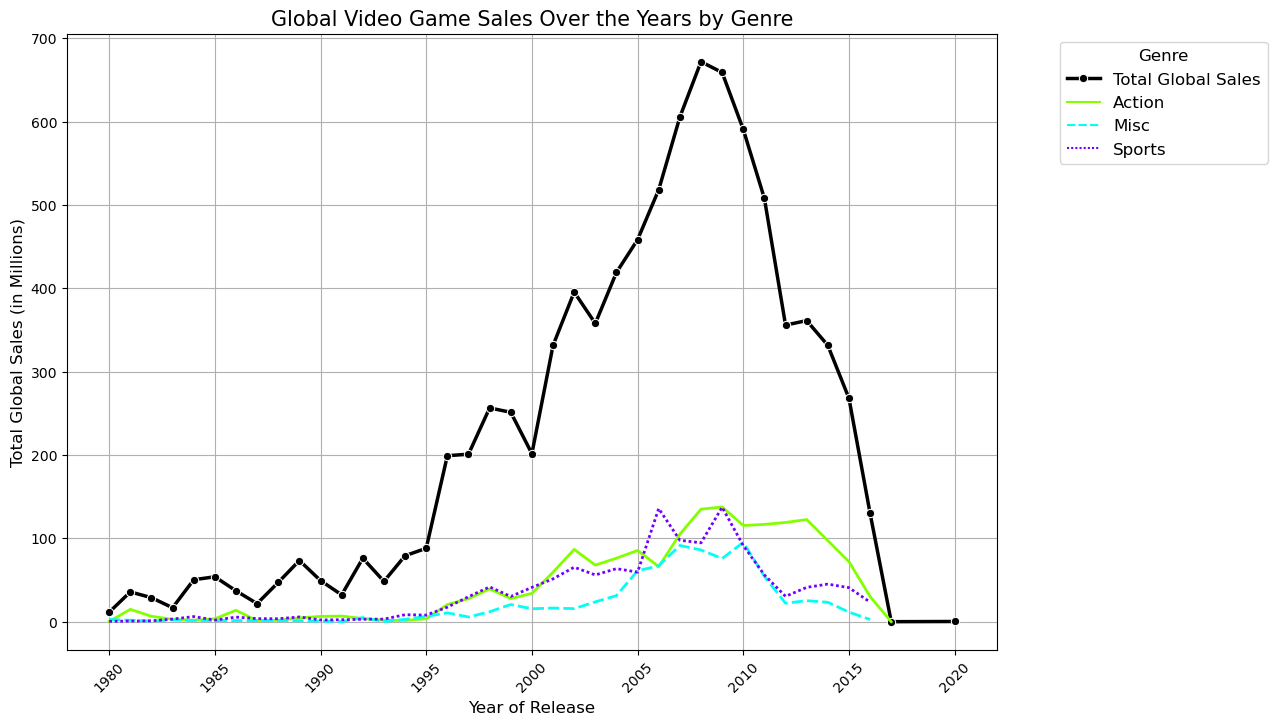

In [31]:
yearly_sales = Games.groupby('Year_of_Release')['Global_Sales'].sum()

top_genres_for_trend = Games['Genre'].value_counts().nlargest(3).index

genre_sales_trend = Games[Games['Genre'].isin(top_genres_for_trend)]
genre_sales_trend = genre_sales_trend.groupby(['Year_of_Release', 'Genre'])['Global_Sales'].sum().unstack()
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_sales, label='Total Global Sales', color='black', linewidth=2.5, marker='o')

palette = sns.color_palette("hsv", len(top_genres_for_trend))
sns.lineplot(data=genre_sales_trend, palette=palette, linewidth=2)

plt.title('Global Video Game Sales Over the Years by Genre', fontsize=15)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Global Sales (in Millions)', fontsize=12)
plt.legend(title='Genre',loc='upper right',fontsize='large', title_fontsize='large', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
